<a href="https://colab.research.google.com/github/FisayoAdeyemi/Linkedin_Google_ProfileScraper/blob/main/Group_1_Final_APPP_Project_13th_Apr.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Step 0: Importing necessary Python Libraries



In [1]:
#Importing necessary libraries

import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split

from sklearn import metrics
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.preprocessing import OneHotEncoder, OrdinalEncoder, LabelEncoder, StandardScaler, MinMaxScaler, Normalizer
from sklearn.impute import SimpleImputer

from sklearn import tree

import seaborn as sb
import matplotlib.pyplot as plt
%matplotlib inline
import pylab as plt


import tensorflow as tf
from tensorflow import keras # importing keras library
from keras.layers import Dropout
from keras.layers import BatchNormalization
from tensorflow.keras.models import Sequential  # importing the Sequential Model
from tensorflow.keras.layers import Dense       # importing Dense layer


initializer = tf.keras.initializers.GlorotNormal()




# Step 1: Importing the Dataset & Exploratory Data Analysis


In [2]:
url = 'https://raw.githubusercontent.com/FisayoAdeyemi/appp505group1/main/EUI.csv'
df = pd.read_csv(url)  # Dataset - Breast Cancer Wisconsin Data
df.info()  #Displaying first five rows of the dataset

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3187 entries, 0 to 3186
Data columns (total 7 columns):
 #   Column                                    Non-Null Count  Dtype  
---  ------                                    --------------  -----  
 0   Region                                    3187 non-null   object 
 1   Consumption (ekWh)                        3187 non-null   float64
 2   Floor area (ft2)                          3187 non-null   float64
 3   EUI (kW/ft2)                              3187 non-null   float64
 4   Emission (tCO2e)                          3187 non-null   float64
 5   Emissions per Floor Area (KgCO2e/sq. ft)  3187 non-null   float64
 6   Reporting Year                            3187 non-null   int64  
dtypes: float64(5), int64(1), object(1)
memory usage: 174.4+ KB


In [3]:
df.head(5)  #Displaying first 5 rows of the dataset


,Region,Consumption (ekWh),Floor area (ft2),EUI (kW/ft2),Emission (tCO2e),Emissions per Floor Area (KgCO2e/sq. ft),Reporting Year
0,Vancouver Coastal,203568.160000,66284.660000,3.071120,2.172072,0.032769,2018
1,Vancouver Coastal,476338.290774,43336.000000,10.991746,5.082530,0.117282,2019
2,Vancouver Coastal,480170.842656,43336.000000,11.080184,5.123423,0.118226,2020
3,Vancouver Coastal,422504.352617,43335.933894,9.749515,4.098292,0.094570,2021
4,Vancouver Coastal,203153.090000,43335.952553,4.687865,2.335935,0.053903,2022


In [4]:
# Checking the unique regions

df["Region"].unique()

array(['Vancouver Coastal', 'Vancouver Island', 'Fraser', 'Northern',
       'Interior'], dtype=object)

In [5]:
df.dropna(inplace=True)
nan_counts = df.isna().sum()
print(nan_counts)

Region                                      0
Consumption (ekWh)                          0
Floor area (ft2)                            0
EUI (kW/ft2)                                0
Emission (tCO2e)                            0
Emissions per Floor Area (KgCO2e/sq. ft)    0
Reporting Year                              0
dtype: int64


In [6]:
# One-hot encode nominal categorical variables
one_hot_encoder = OneHotEncoder(sparse_output=False)
one_hot_encoded = one_hot_encoder.fit_transform(df[['Region']])

# Get feature names for the one-hot encoded columns
columns = one_hot_encoder.get_feature_names_out(['Region', ])

# Create a DataFrame with the one-hot encoded variables
one_hot_df = pd.DataFrame(one_hot_encoded, columns=columns)

# Ensure the original DataFrame's index aligns with the new one-hot DataFrame
one_hot_df.set_index(df.index, inplace=True)

# Concatenate the original DataFrame with the new one-hot encoded DataFrame
df_encoded = pd.concat([df, one_hot_df], axis=1)

df_encoded = df_encoded.drop(['Region'], axis=1)
df_encoded.head()  #show the DataFrame without the original categorical columns


,Consumption (ekWh),Floor area (ft2),EUI (kW/ft2),Emission (tCO2e),Emissions per Floor Area (KgCO2e/sq. ft),Reporting Year,Region_Fraser,Region_Interior,Region_Northern,Region_Vancouver Coastal,Region_Vancouver Island
0,203568.160000,66284.660000,3.071120,2.172072,0.032769,2018,0.0,0.0,0.0,1.0,0.0
1,476338.290774,43336.000000,10.991746,5.082530,0.117282,2019,0.0,0.0,0.0,1.0,0.0
2,480170.842656,43336.000000,11.080184,5.123423,0.118226,2020,0.0,0.0,0.0,1.0,0.0
3,422504.352617,43335.933894,9.749515,4.098292,0.094570,2021,0.0,0.0,0.0,1.0,0.0
4,203153.090000,43335.952553,4.687865,2.335935,0.053903,2022,0.0,0.0,0.0,1.0,0.0


In [7]:
# Checking the validity of the data
df_encoded.describe(include='all').T



,count,mean,std,min,25%,50%,75%,max
Consumption (ekWh),3187.0,103702.731321,121356.527909,0.0,20265.020000,37497.290000,163535.280000,499589.450000
Floor area (ft2),3187.0,11877.927959,13704.441928,963.0,2536.000000,4236.029305,18408.000000,69999.969861
EUI (kW/ft2),3187.0,9.628668,5.159880,0.0,5.810636,9.103852,12.618861,29.114878
Emission (tCO2e),3187.0,1.090591,1.286315,0.0,0.211823,0.393983,1.704189,5.735311
Emissions per Floor Area (KgCO2e/sq. ft),3187.0,0.101274,0.055628,0.0,0.060441,0.095761,0.134556,0.299265
Reporting Year,3187.0,2020.039222,1.385072,2018.0,2019.000000,2020.000000,2021.000000,2022.000000
Region_Fraser,3187.0,0.242862,0.428879,0.0,0.000000,0.000000,0.000000,1.000000
Region_Interior,3187.0,0.181989,0.385896,0.0,0.000000,0.000000,0.000000,1.000000
Region_Northern,3187.0,0.097898,0.297223,0.0,0.000000,0.000000,0.000000,1.000000
Region_Vancouver Coastal,3187.0,0.249765,0.432945,0.0,0.000000,0.000000,0.000000,1.000000


In [8]:
#Checking for nulls
df_encoded.isna().sum()

Consumption (ekWh)                          0
Floor area (ft2)                            0
EUI (kW/ft2)                                0
Emission (tCO2e)                            0
Emissions per Floor Area (KgCO2e/sq. ft)    0
Reporting Year                              0
Region_Fraser                               0
Region_Interior                             0
Region_Northern                             0
Region_Vancouver Coastal                    0
Region_Vancouver Island                     0
dtype: int64

In [9]:
df_encoded.skew()

Consumption (ekWh)                          1.432148
Floor area (ft2)                            1.764787
EUI (kW/ft2)                                0.637704
Emission (tCO2e)                            1.459791
Emissions per Floor Area (KgCO2e/sq. ft)    0.665381
Reporting Year                             -0.051106
Region_Fraser                               1.199870
Region_Interior                             1.649201
Region_Northern                             2.707428
Region_Vancouver Coastal                    1.156695
Region_Vancouver Island                     1.300742
dtype: float64

# Step 2: A bit of visualization

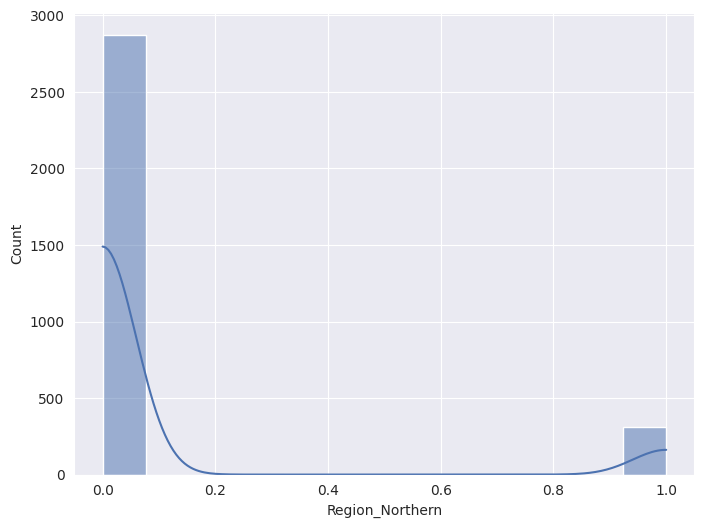

In [10]:
# To see skewness of Region_Northern
sb.set({'figure.figsize': (8,6)})
sb.histplot(df_encoded['Region_Northern'], kde=True);


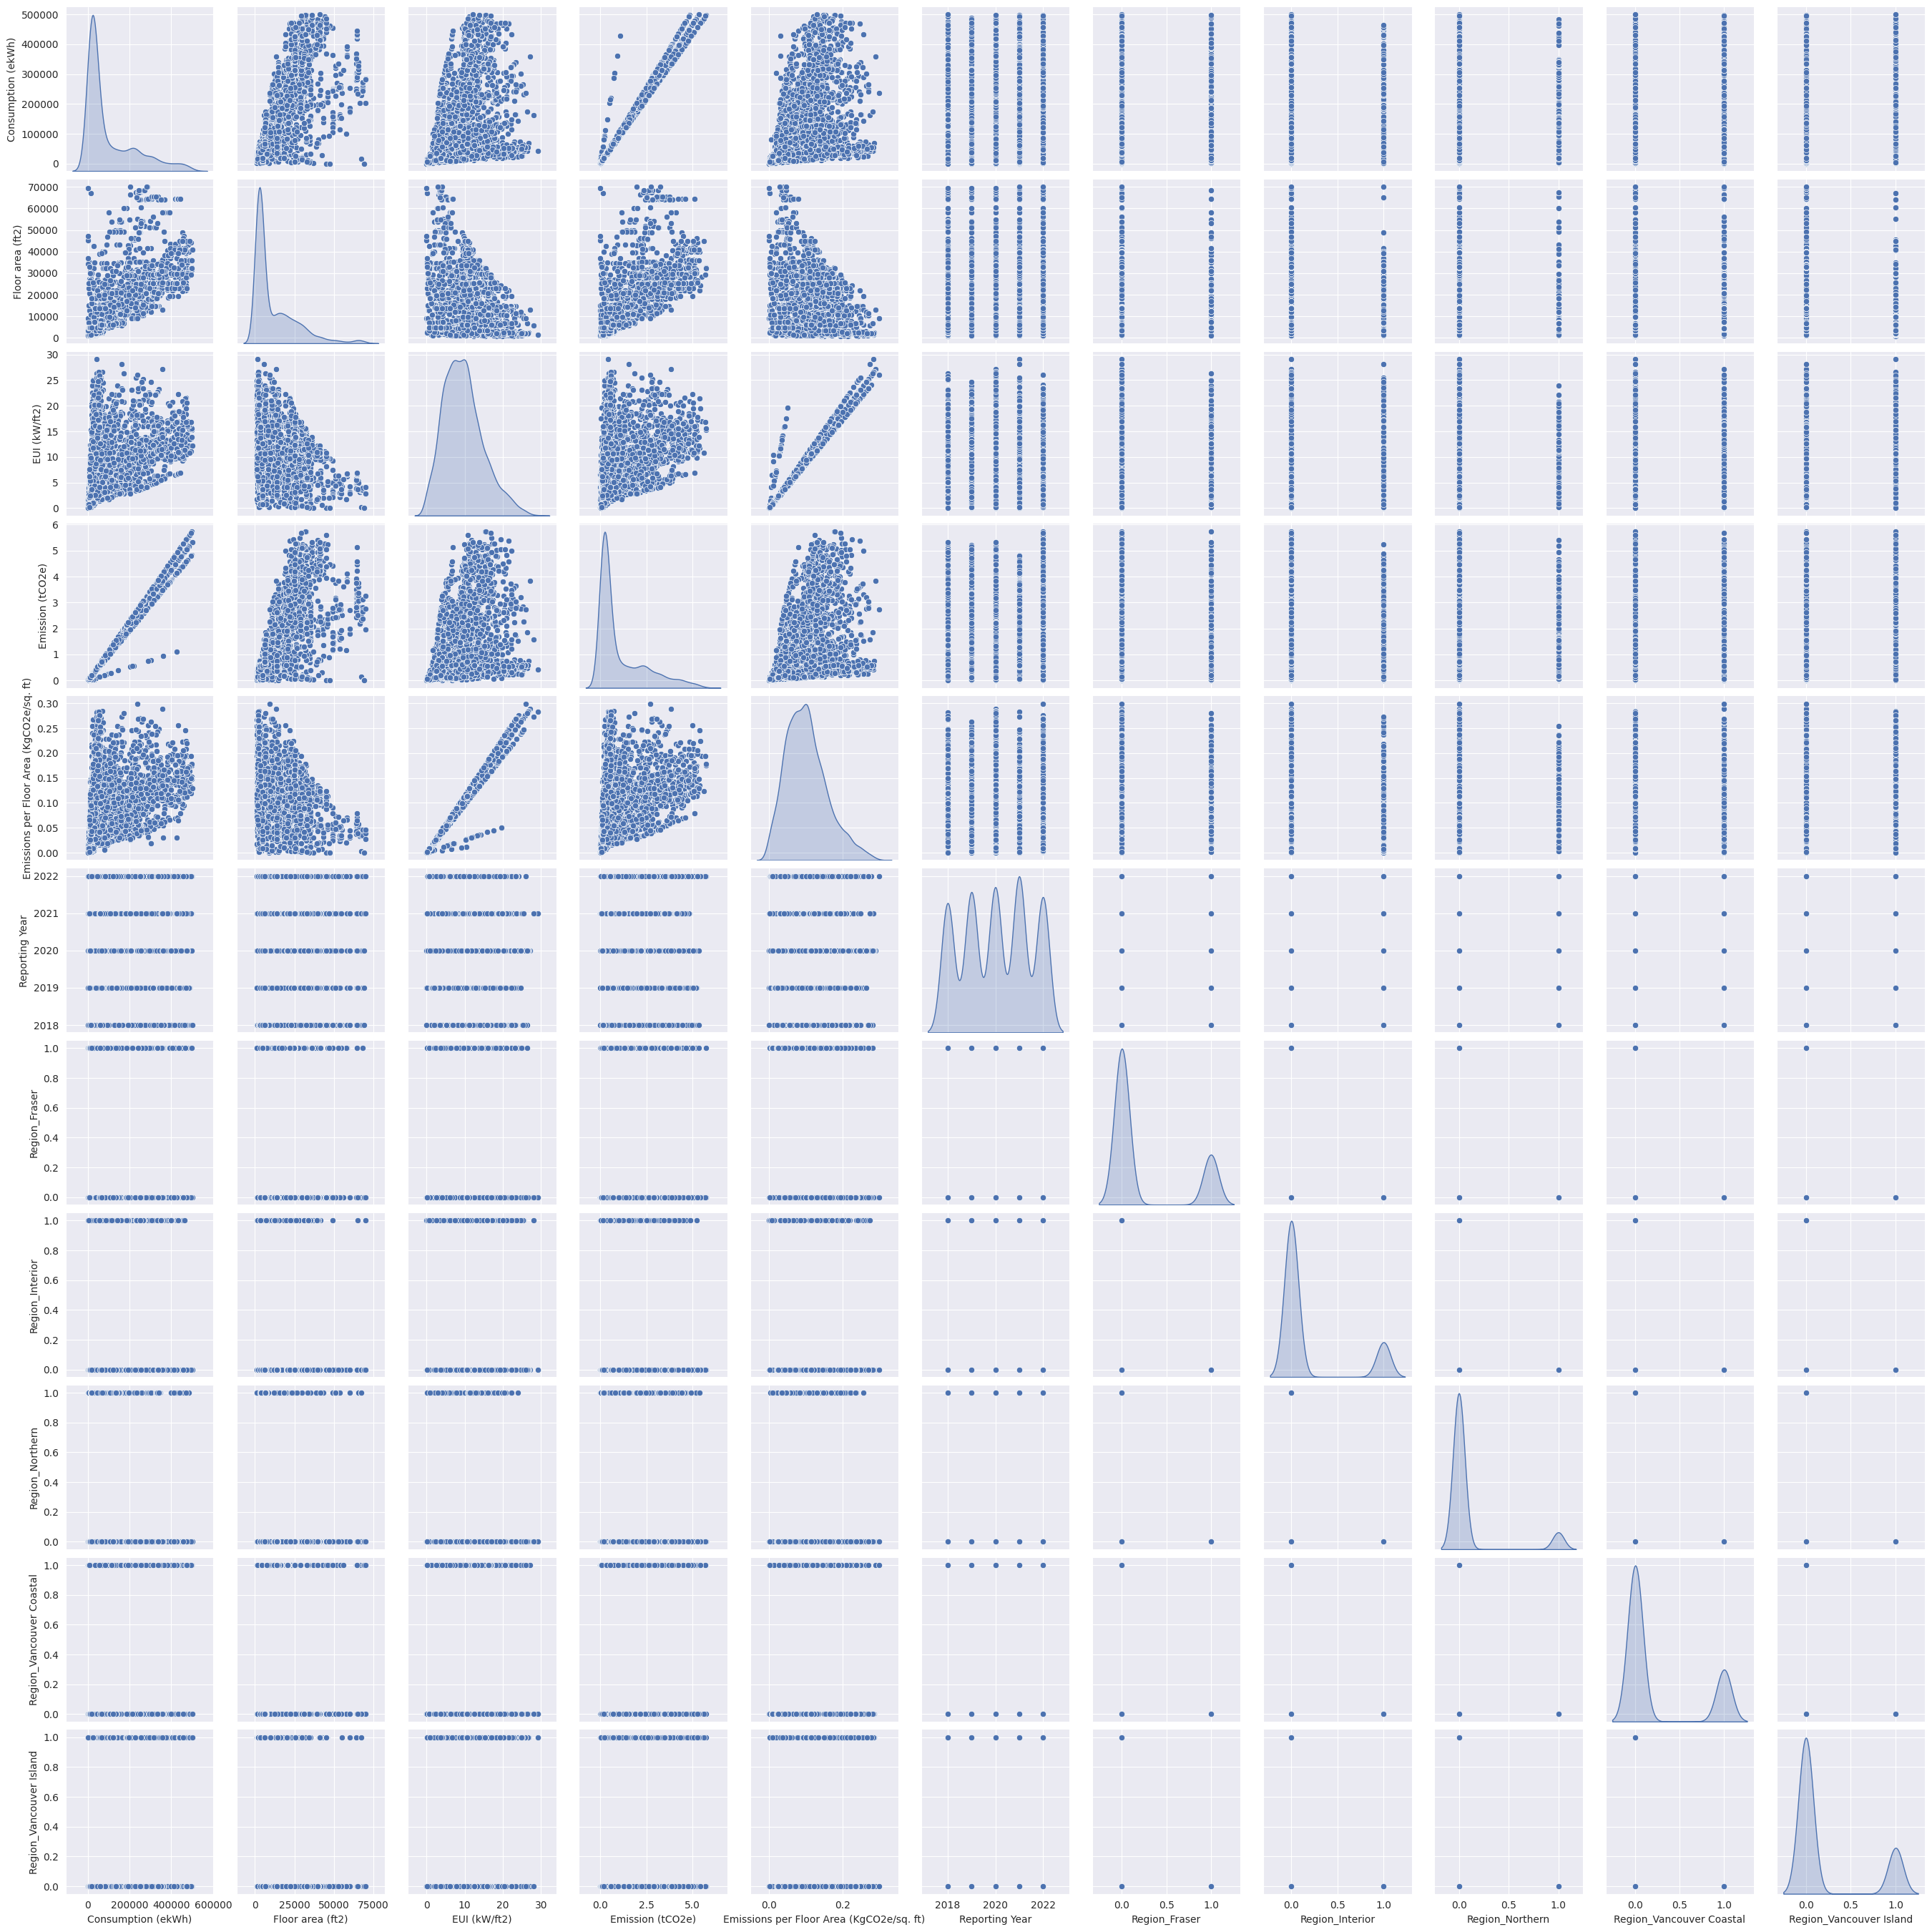

In [11]:
# Pairplot using seaborn
sb.pairplot(df_encoded, diag_kind='kde');



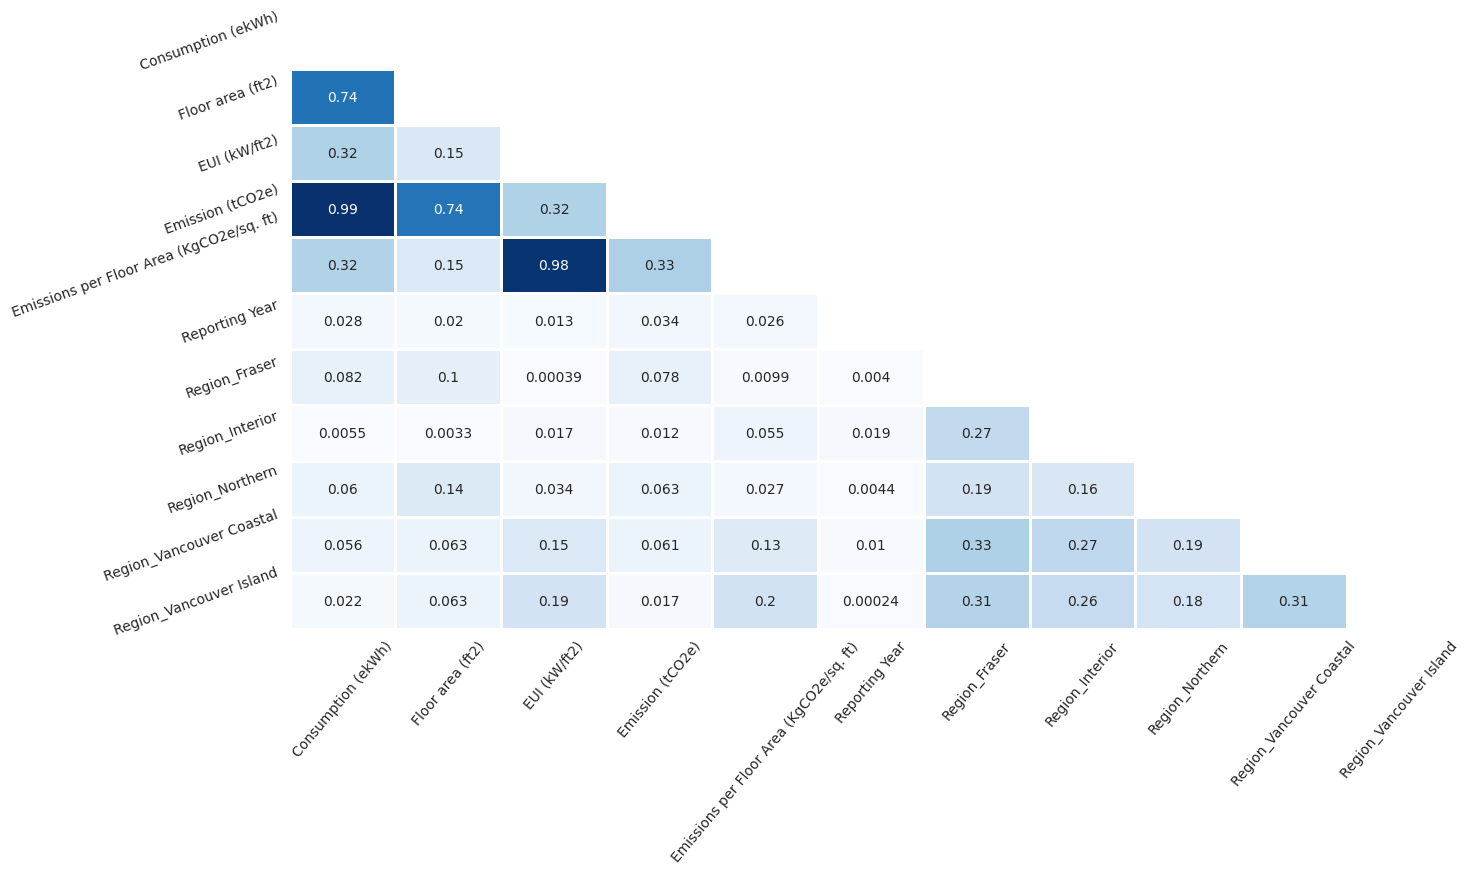

In [12]:
corr = abs(df_encoded.corr())                 # correlation matrix
lower_triangle = np.tril(corr, k = -1)  # select only the lower triangle of the correlation matrix
mask = lower_triangle == 0              # to mask the upper triangle in the following heatmap

plt.figure(figsize = (15,8))            # setting the figure size
sb.set_style(style = 'white')          # Setting it to white so that we do not see the grid lines
sb.heatmap(lower_triangle, center=0.5, cmap= 'Blues', annot= True, xticklabels = corr.index, yticklabels = corr.columns,
            cbar= False, linewidths= 1, mask = mask)   # Da Heatmap
plt.xticks(rotation = 50)               # Aesthetic purposes
plt.yticks(rotation = 20)               # Aesthetic purposes
plt.show()



<Axes: >

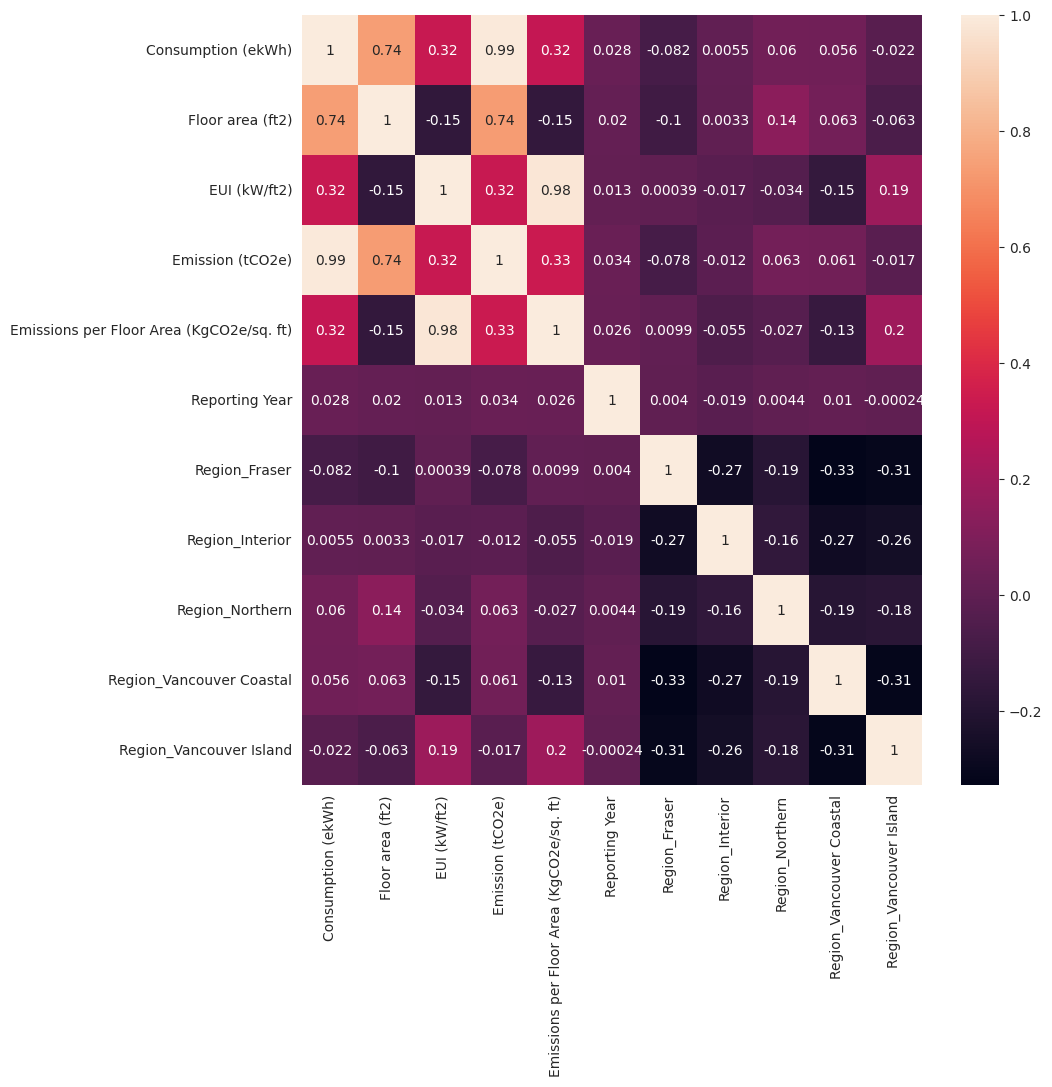

In [13]:
plt.figure(figsize = (10,10))
sb.heatmap(df_encoded.corr(), annot = True)


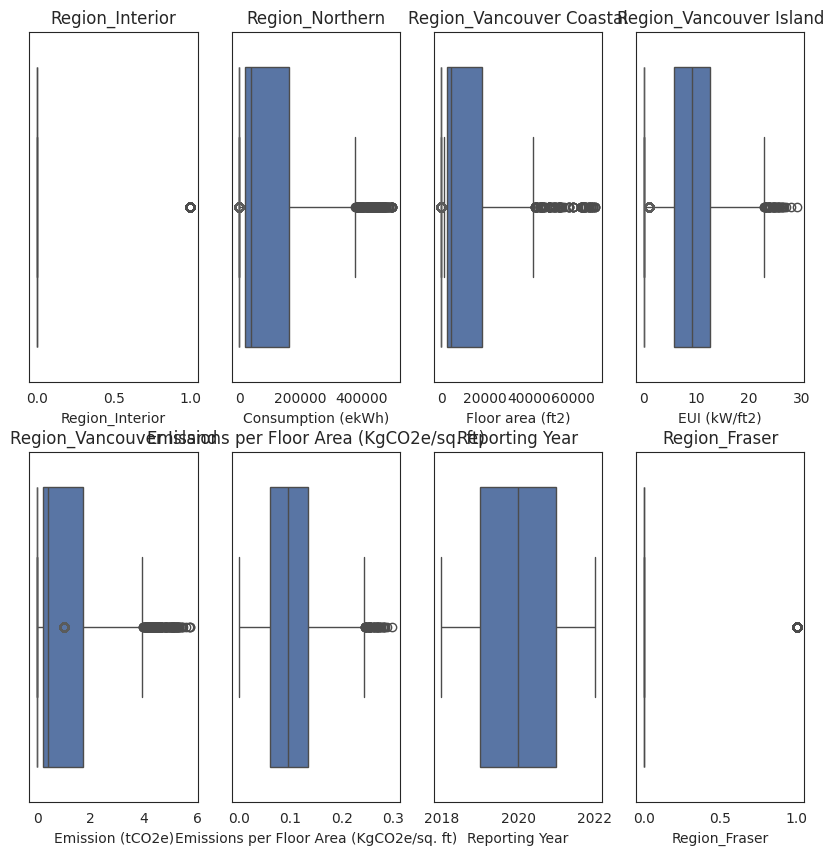

In [14]:
features = ['Consumption (ekWh)','Floor area (ft2)','EUI (kW/ft2)','Emission (tCO2e)','Emissions per Floor Area (KgCO2e/sq. ft)','Reporting Year','Region_Fraser','Region_Interior', 'Region_Northern', 'Region_Vancouver Coastal', 'Region_Vancouver Island', 'Region_Vancouver Island']

plt.figure(figsize = (10,10))
for i, feature in enumerate(features):
    plt.subplot(2,4,(i+1)%8 + 1)
    sb.boxplot(x = df_encoded[feature])
    plt.title(feature)


# Step 3: Data Pre-processing / some cleaning

In [15]:
# df_encoded is our preprocessed DataFrame
X = df_encoded.drop('EUI (kW/ft2)', axis=1)  # features
y = df_encoded['EUI (kW/ft2)']  # target variable



In [16]:
# Split the dataset into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)

# Standard Scaling
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)  # use the same scaler to transform the test set




In [17]:
missing_values = X_train.isnull().sum().sum()

if missing_values > 0:
    print("There are missing values in the training data.")

else:
    print("No missing values, You are good to go!")
    # Handle missing values (e.g., impute missing values)

No missing values, You are good to go!


# Step 4: Train-Test Split

In [18]:
np.random.seed(1)
msk = np.random.rand(len(df_encoded)) < 0.7  #An array containing True(with probability 0.7) and False
train = df_encoded[msk]  #Rows having array value true
test = df_encoded[~msk]  #Rows having array value False
print('Number of observations in the training data: ', len(train))
print('Number of observations in the test data: ', len(test))

Number of observations in the training data:  2241
Number of observations in the test data:  946


In [19]:
train.head()

,Consumption (ekWh),Floor area (ft2),EUI (kW/ft2),Emission (tCO2e),Emissions per Floor Area (KgCO2e/sq. ft),Reporting Year,Region_Fraser,Region_Interior,Region_Northern,Region_Vancouver Coastal,Region_Vancouver Island
0,203568.160000,66284.660000,3.071120,2.172072,0.032769,2018,0.0,0.0,0.0,1.0,0.0
2,480170.842656,43336.000000,11.080184,5.123423,0.118226,2020,0.0,0.0,0.0,1.0,0.0
3,422504.352617,43335.933894,9.749515,4.098292,0.094570,2021,0.0,0.0,0.0,1.0,0.0
4,203153.090000,43335.952553,4.687865,2.335935,0.053903,2022,0.0,0.0,0.0,1.0,0.0
5,294665.160000,22949.000000,12.840000,3.144077,0.137003,2019,0.0,0.0,0.0,1.0,0.0


In [20]:
test.head()

,Consumption (ekWh),Floor area (ft2),EUI (kW/ft2),Emission (tCO2e),Emissions per Floor Area (KgCO2e/sq. ft),Reporting Year,Region_Fraser,Region_Interior,Region_Northern,Region_Vancouver Coastal,Region_Vancouver Island
1,476338.290774,43336.000000,10.991746,5.082530,0.117282,2019,0.0,0.0,0.0,1.0,0.0
13,280351.010000,64000.000000,4.380485,2.991345,0.046740,2019,0.0,0.0,0.0,1.0,0.0
20,149439.750000,29870.000000,5.003005,1.594522,0.053382,2018,0.0,0.0,0.0,0.0,1.0
21,164824.380000,29870.000000,5.518058,1.758676,0.058878,2019,0.0,0.0,0.0,0.0,1.0
24,152391.640000,29869.971906,5.101834,1.752260,0.058663,2022,0.0,0.0,0.0,0.0,1.0


# Step 5: Build a Decition Tree model
Building the DT model in Python using sklearn

In [21]:
from sklearn.tree import DecisionTreeRegressor,plot_tree
dtr=DecisionTreeRegressor(max_depth=3, random_state=7)


In [22]:
# train model
dtr.fit(X_train_scaled,y_train)

DecisionTreeRegressor(max_depth=3, random_state=7)

In [23]:
# evaluate the model on training sample
print(dtr.score(X_train_scaled,y_train))
print(dtr.score(X_test_scaled, y_test))

0.938796823550827
0.925205894245862


In [24]:
# cross validate model on train sample
from sklearn.model_selection import cross_validate
cross_validate(dtr, X_train_scaled, y_train, cv=5)

{'fit_time': array([0.0088706 , 0.00438404, 0.00408459, 0.00392652, 0.00388741]),
 'score_time': array([0.00101733, 0.00063157, 0.00060749, 0.00057316, 0.00056767]),
 'test_score': array([0.94589829, 0.92989927, 0.94306342, 0.93982594, 0.92631181])}

In [25]:
# evaluate the model on the test sample
dtr.score(X_test_scaled,y_test)

# Print the model accuracy
print(f"Your Decision Tree model accuracy on test set is {dtr.score(X_test_scaled,y_test):.2%}")

Your Decision Tree model accuracy on test set is 92.52%


# Step 6: Visualize the Decision Tree model

Let's visualize the MODEL to undrstabd how it works!

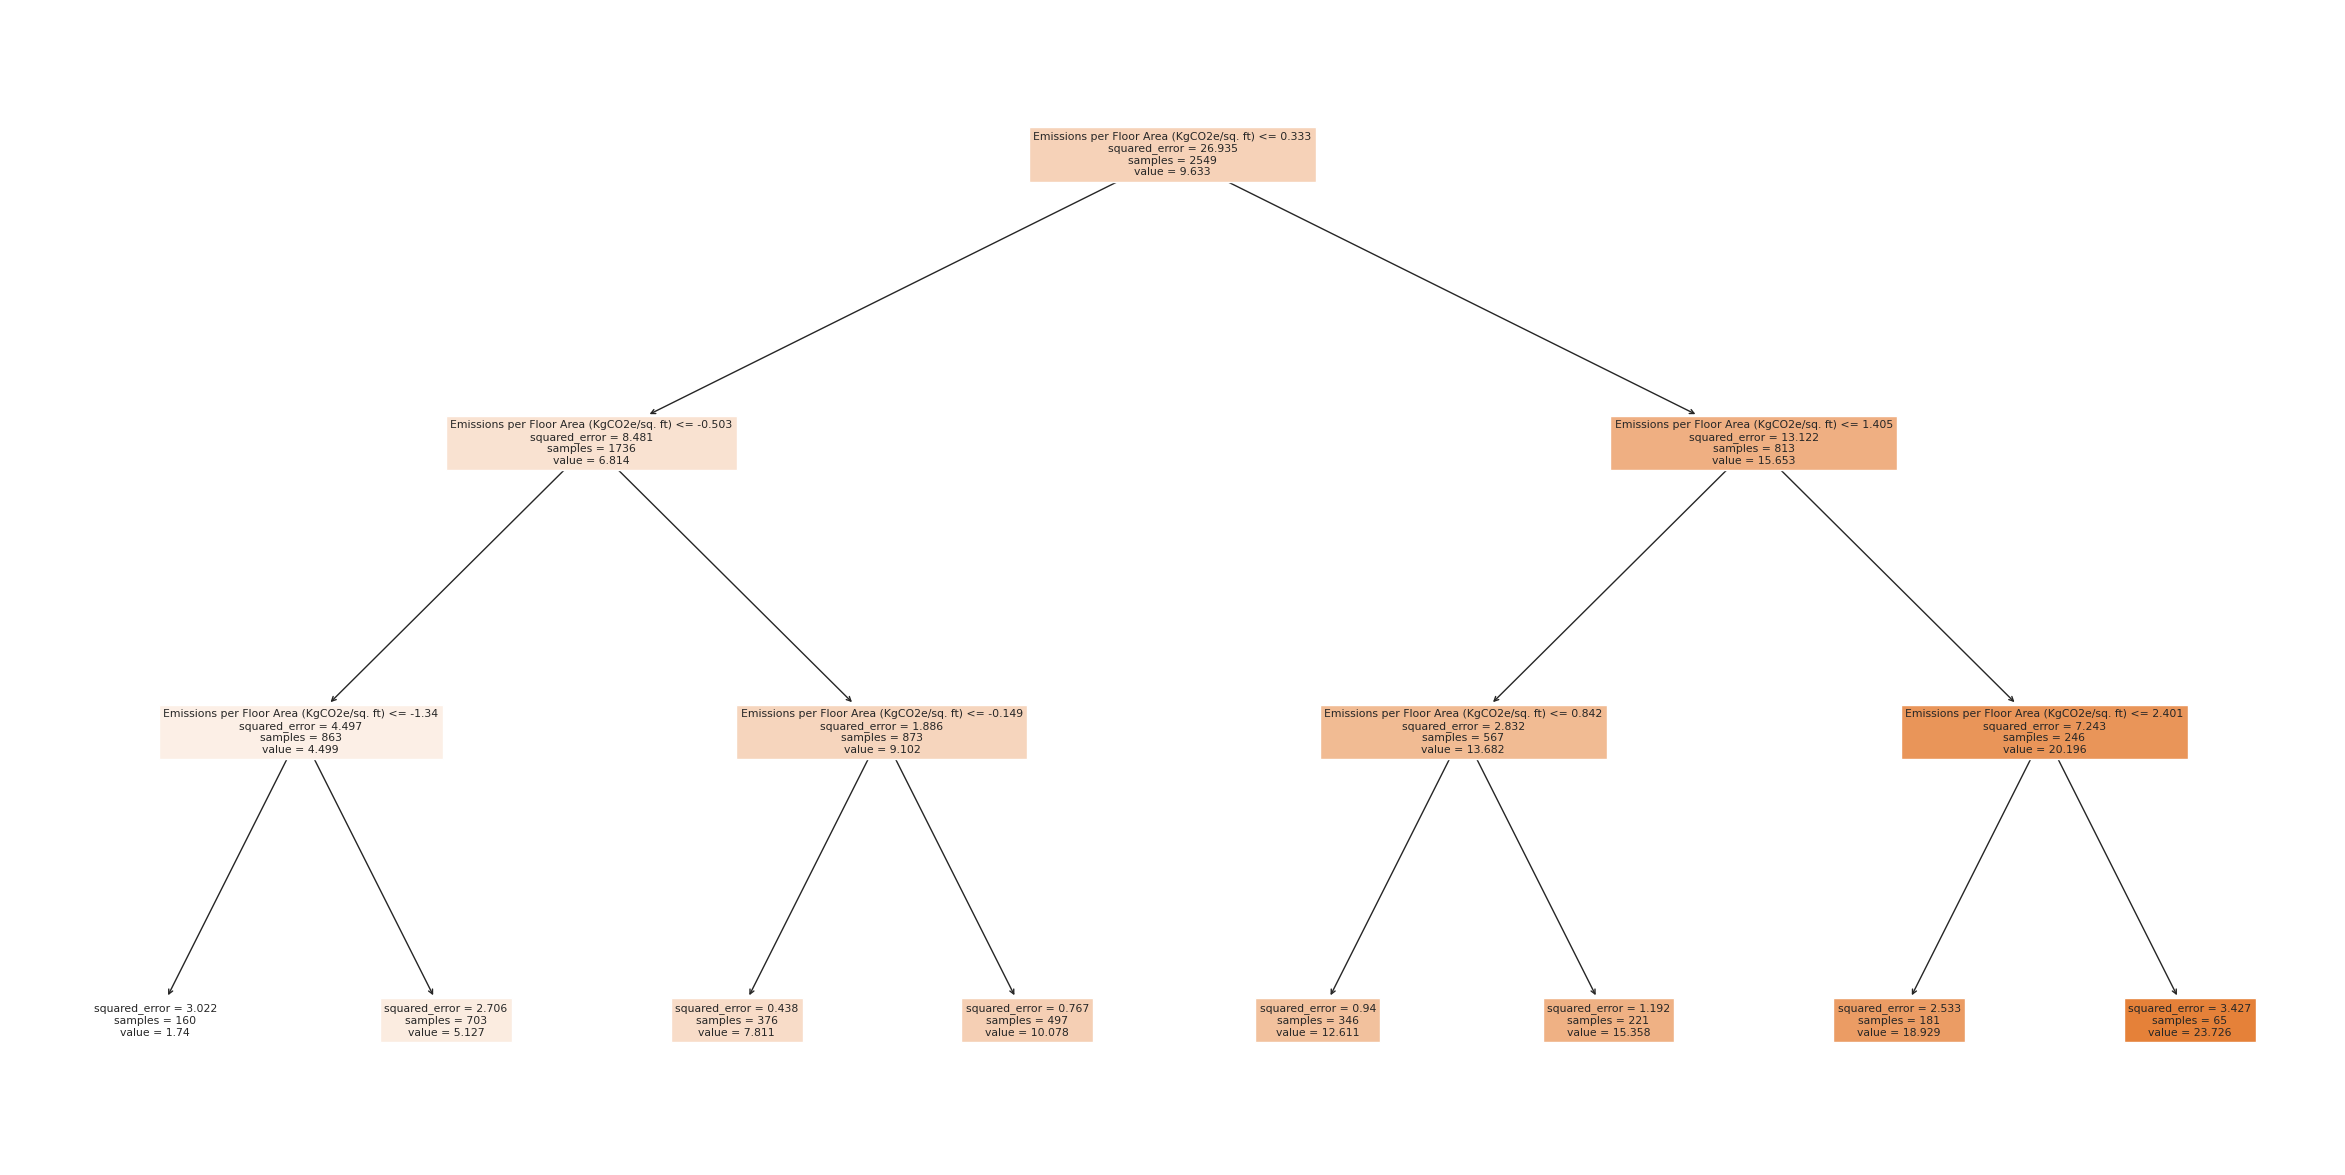

In [26]:
# plot tree
fig,ax = plt.subplots(figsize=(30,15))
final=DecisionTreeRegressor(max_depth=3, random_state=2529)
final.fit(X_train_scaled,y_train)
plot_tree(final,feature_names=X.columns,filled=True);

# Step 7: Exploring more options available for Decision Tree


So far, we only used the max_depth parameter. Try exploring some other options available when defining your Decision Tree.

https://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeClassifier.html#sklearn.tree.DecisionTreeClassifier

Take a look at the link above and try out the following features by specifying them when defining your Decision Tree model:  
- criterion
- min_samples_split

Notice the impact of these options on your final model.

In [27]:
from sklearn.model_selection import cross_val_score, KFold
k = KFold(random_state=7, n_splits=5, shuffle=True)

# KFold will split the data in 5 equal parts



In [28]:
algo= []
cv_r2_mean = []
cv_r2_std = []
cv_rmse_mean = []

# Blanks list to store model name, cross validated r2 score (mean and standard deviation) and RMSE

In [29]:
#Degree 2
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import PolynomialFeatures

pipeline = Pipeline([
    ('poly',PolynomialFeatures(degree=2, interaction_only=True)),
    ('reg', DecisionTreeRegressor(random_state=7))
])

pipeline.fit(X_train, y_train)

print(pipeline.score(X_train, y_train))

print(pipeline.score(X_test, y_test))

1.0
0.9743304629869727


In [30]:
# Linear Regression
## Since the dataset is small therefore using complete dataset for cv

from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler
pipeline = Pipeline([
    ('scaler', StandardScaler()),
    ('reg', LinearRegression())
])

pipeline.fit(X_train_scaled, y_train)


algo.append('Linear Regression')
cv_r2_mean.append(cross_val_score(pipeline, X, y, cv=k).mean())
cv_r2_std.append(cross_val_score(pipeline, X, y, cv=k).std())
cv_rmse_mean.append((-cross_val_score(pipeline, X, y, cv=k, scoring='neg_mean_squared_error').mean())**0.5)

In [31]:
# Decision Tree

model = DecisionTreeRegressor(random_state=7)

model.fit(X_train_scaled, y_train)


algo.append('Decision Tree')
cv_r2_mean.append(cross_val_score(model, X, y, cv=k).mean())
cv_r2_std.append(cross_val_score(model, X, y, cv=k).std())
cv_rmse_mean.append((-cross_val_score(model, X, y, cv=k, scoring='neg_mean_squared_error').mean())**0.5)


In [32]:
# Random Forest
from sklearn.ensemble import RandomForestRegressor

model = RandomForestRegressor(random_state=7)

model.fit(X_train_scaled, y_train)


algo.append('Random Forest')
cv_r2_mean.append(cross_val_score(model, X, y, cv=k).mean())
cv_r2_std.append(cross_val_score(model, X, y, cv=k).std())
cv_rmse_mean.append((-cross_val_score(model, X, y, cv=k, scoring='neg_mean_squared_error').mean())**0.5)


In [33]:
# Bagging
from sklearn.ensemble import BaggingRegressor

model = BaggingRegressor(random_state=7)

model.fit(X_train_scaled, y_train)


algo.append('Bagging')
cv_r2_mean.append(cross_val_score(model, X, y, cv=k).mean())
cv_r2_std.append(cross_val_score(model, X, y, cv=k).std())
cv_rmse_mean.append((-cross_val_score(model, X, y, cv=k, scoring='neg_mean_squared_error').mean())**0.5)


In [34]:
# AdaBoost
from sklearn.ensemble import AdaBoostRegressor

model = AdaBoostRegressor(random_state=7)

model.fit(X_train_scaled, y_train)


algo.append('AdaBoost')
cv_r2_mean.append(cross_val_score(model, X, y, cv=k).mean())
cv_r2_std.append(cross_val_score(model, X, y, cv=k).std())
cv_rmse_mean.append((-cross_val_score(model, X, y, cv=k, scoring='neg_mean_squared_error').mean())**0.5)

In [35]:
# Gradient Boosting
from sklearn.ensemble import GradientBoostingRegressor

model = GradientBoostingRegressor(random_state=7)

model.fit(X_train_scaled, y_train)

algo.append('Gradient Boosting')
cv_r2_mean.append(cross_val_score(model, X, y, cv=k).mean())
cv_r2_std.append(cross_val_score(model, X, y, cv=k).std())
cv_rmse_mean.append((-cross_val_score(model, X, y, cv=k, scoring='neg_mean_squared_error').mean())**0.5)

In [36]:
# DataFrame to compare results.

results = pd.DataFrame()
results['Model'] = algo
results['CV R2 score mean'] = cv_r2_mean
results['CV R2 score std'] = cv_r2_std
results['CV RMSE'] = cv_rmse_mean
results = results.set_index('Model')
results


,CV R2 score mean,CV R2 score std,CV RMSE
Model,,,
Linear Regression,0.977698,0.010541,0.770852
Decision Tree,0.979303,0.006829,0.741183
Random Forest,0.987632,0.007732,0.573916
Bagging,0.986402,0.007640,0.601555
AdaBoost,0.917542,0.012827,1.479228
Gradient Boosting,0.991130,0.004926,0.485845


# Step 8: Builing Neural Network 1 (Alpha)


In [37]:
initializer = tf.keras.initializers.GlorotNormal()

def build_model_Skeleton():

    ## Initializing the ANN
    model = Sequential()

    # This adds the input layer (by specifying input dimension) AND the first hidden layer (units)
    input_layer = Dense(8, input_shape=(X_train.shape[1],),activation='relu', kernel_initializer=initializer)
    model.add(input_layer) #

    #Adding the hidden layer
    # Notice that we do not need to specify input dim.
    hidden_layer = Dense(16, activation='relu', kernel_initializer=initializer);
    model.add(hidden_layer)

    #Adding the output layer
    # Notice that we do not need to specify input dim.
    # we have an output of 1 node, which is the the desired dimensions of our output (stay with the bank or not)
    # We use the sigmoid because we want probability outcomes

    output_layer = Dense(1,activation='relu')

    model.add(output_layer)


    optimizer = keras.optimizers.RMSprop(0.001)  # Defining the optimizer #0.01 #0.001 #0.0001

    #Loss function
    model.compile(loss='mse',
                optimizer=optimizer,
                metrics='mse')  # Defining the loss function, optimizer and metrices
    return model

In [38]:
model1 = build_model_Skeleton()
model1.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 8)                 88        
                                                                 
 dense_1 (Dense)             (None, 16)                144       
                                                                 
 dense_2 (Dense)             (None, 1)                 17        
                                                                 
Total params: 249 (996.00 Byte)
Trainable params: 249 (996.00 Byte)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


/usr/local/lib/python3.10/dist-packages/keras/src/initializers/initializers.py:120: UserWarning: The initializer GlorotNormal is unseeded and being called multiple times, which will return identical values each time (even if the initializer is unseeded). Please update your code to provide a seed to the initializer, or avoid using the same initializer instance more than once.
  warnings.warn(


In [39]:
scaler = StandardScaler()

# Scale both the training inputs and outputs
scaled_train_x = scaler.fit_transform(X_train)
scaled_test_x = scaler.transform(X_test)

scaled_train_y = scaler.fit_transform(y_train.values.reshape(-1, 1))
scaled_test_y = scaler.transform(y_test.values.reshape(-1, 1))

<ipython-input-40-c801957a8bf2>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sb.distplot(y_train)


<Axes: xlabel='EUI (kW/ft2)', ylabel='Density'>

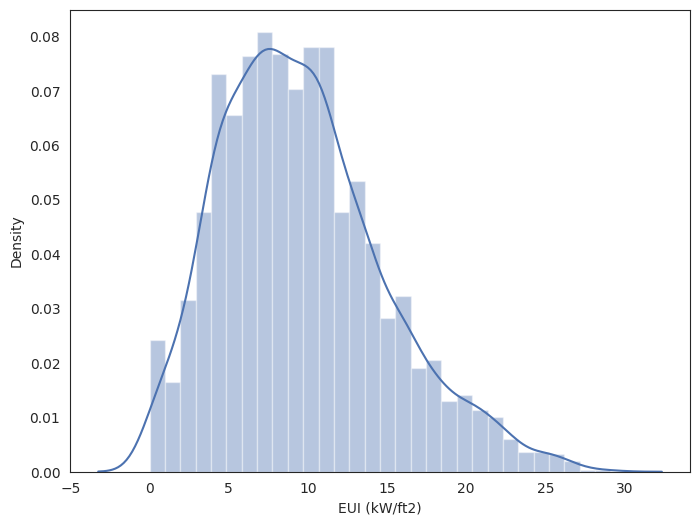

In [40]:
sb.distplot(y_train)

In [42]:
#Definign the number of epochs
EPOCHS = 100

#fitting the model
model_history = model1.fit(X_train_scaled , y_train, epochs=EPOCHS, validation_split = 0.3, verbose=0)

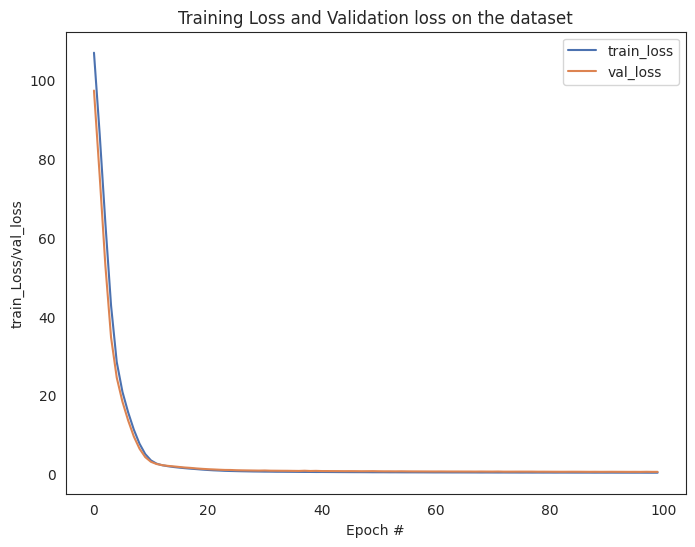

In [43]:
N = 100 #Similar to Size of Epoch

plt.figure(figsize=(8,6))
plt.plot(np.arange(0, N), model_history.history["loss"], label="train_loss")
plt.plot(np.arange(0, N), model_history.history["val_loss"], label="val_loss")

plt.title("Training Loss and Validation loss on the dataset")
plt.xlabel("Epoch #")
plt.ylabel("train_Loss/val_loss")
plt.legend(loc="best")
plt.show()

In [44]:
model1.evaluate(X_test_scaled , y_test)

20/20 [==============================] - 0s 2ms/step - loss: 0.6774 - mse: 0.6774


[0.6774295568466187, 0.6774295568466187]

In [45]:
# Evaluate the model
loss, accuracy_1 = model1.evaluate(X_test_scaled, y_test)

# Print the model accuracy
print(f"Your first model accuracy is {accuracy_1:.2%}")

20/20 [==============================] - 0s 2ms/step - loss: 0.6774 - mse: 0.6774
Your first model accuracy is 67.74%


# Step 8: Builing Neural Network 2 (Beta)


In [46]:
def build_model_dropout():
  ## Initializing the ANN


    model = Sequential()
    # This adds the input layer (by specifying input dimension) AND the first hidden layer (units)
    input_layer = Dense(8, input_shape=(X_train.shape[1],),activation='relu',kernel_initializer='he_normal')
    model.add(input_layer) #

    #Adding the hidden layer
    model.add(BatchNormalization())# defining the batchnorm
    model.add(Dropout(0.01))# defining the dropout

    # Notice that we do not need to specify input dim.
    hidden_layer = Dense(4, activation='relu',kernel_initializer='he_normal'); # defining the weight initialiazer
    model.add(hidden_layer)



    #Adding the output layer
    # Notice that we do not need to specify input dim.
    # we have an output of 1 node, which is the the desired dimensions of our output (stay with the bank or not)
    # We use the sigmoid because we want probability outcomes
    output_layer = Dense(1,activation='relu',kernel_initializer='he_normal')

    model.add(output_layer)


    optimizer = keras.optimizers.RMSprop(0.001)  # Defining the optimizer

    #Loss function
    model.compile(loss='mse',
                optimizer=optimizer,
                metrics=[ 'mse'])  # Defining the loss function, optimizer and metrices
    return model

In [47]:
#Getting the model summary. We are uisng standalone keras to build our model
model2 = build_model_dropout()
model2.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_3 (Dense)             (None, 8)                 88        
                                                                 
 batch_normalization (Batch  (None, 8)                 32        
 Normalization)                                                  
                                                                 
 dropout (Dropout)           (None, 8)                 0         
                                                                 
 dense_4 (Dense)             (None, 4)                 36        
                                                                 
 dense_5 (Dense)             (None, 1)                 5         
                                                                 
Total params: 161 (644.00 Byte)
Trainable params: 145 (580.00 Byte)
Non-trainable params: 16 (64.00 Byte)
______________

In [48]:
#Definign the number of epochs

EPOCHS = 100

#fitting the model
model_history1 = model2.fit(X_train_scaled , y_train, epochs=EPOCHS, validation_split = 0.3, verbose=0,)

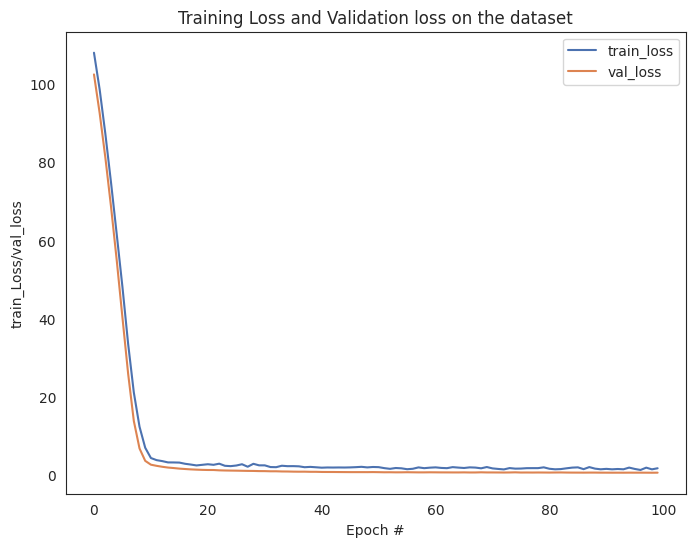

In [49]:
N = 100

plt.figure(figsize=(8,6))
plt.plot(np.arange(0, N), model_history1.history["loss"], label="train_loss")
plt.plot(np.arange(0, N), model_history1.history["val_loss"], label="val_loss")

plt.title("Training Loss and Validation loss on the dataset")
plt.xlabel("Epoch #")
plt.ylabel("train_Loss/val_loss")
plt.legend(loc="best")
plt.show()

In [50]:
# Evaluate the model
loss, accuracy_2 = model2.evaluate(X_test_scaled, y_test)

# Print the model accuracy
print(f"Your second model accuracy is {accuracy_2:.2%}")

20/20 [==============================] - 0s 2ms/step - loss: 0.7722 - mse: 0.7722
Your second model accuracy is 77.22%


In [51]:
# DataFrame to compare results.

results = pd.DataFrame()
results['Model'] = algo
results['CV R2 score mean'] = cv_r2_mean
results['CV R2 score std'] = cv_r2_std
results['CV RMSE'] = cv_rmse_mean
results = results.set_index('Model')
results


,CV R2 score mean,CV R2 score std,CV RMSE
Model,,,
Linear Regression,0.977698,0.010541,0.770852
Decision Tree,0.979303,0.006829,0.741183
Random Forest,0.987632,0.007732,0.573916
Bagging,0.986402,0.007640,0.601555
AdaBoost,0.917542,0.012827,1.479228
Gradient Boosting,0.991130,0.004926,0.485845
